In [1]:
import pandas as pd

survey = pd.read_csv('Employee_Survey_data.csv')
utilization = pd.read_csv('Utilization_by_employee_Data.csv')
vendor = pd.read_csv('Vendor_options.csv')

In [2]:
survey

,employee_id,memory,processing,storage,inverse_price
0,1743,0.375,0.225,0.150,0.25
1,1752,0.450,0.225,0.075,0.25
2,1758,0.375,0.300,0.075,0.25
3,1825,0.300,0.300,0.150,0.25
4,1842,0.300,0.300,0.150,0.25
...,...,...,...,...,...
141,1463,0.225,0.150,0.375,0.25
142,1625,0.225,0.150,0.375,0.25
143,1377,0.150,0.225,0.375,0.25
144,1353,0.150,0.225,0.375,0.25


In [3]:
utilization

,employee_id,utilization_bin
0,1743,high
1,1752,high
2,1758,high
3,1825,high
4,1842,high
...,...,...
141,1463,low
142,1625,low
143,1377,low
144,1353,low


In [4]:
joined = utilization.merge(survey, 'left', on=['employee_id'])
joined

,employee_id,utilization_bin,memory,processing,storage,inverse_price
0,1743,high,0.375,0.225,0.150,0.25
1,1752,high,0.450,0.225,0.075,0.25
2,1758,high,0.375,0.300,0.075,0.25
3,1825,high,0.300,0.300,0.150,0.25
4,1842,high,0.300,0.300,0.150,0.25
...,...,...,...,...,...,...
141,1463,low,0.225,0.150,0.375,0.25
142,1625,low,0.225,0.150,0.375,0.25
143,1377,low,0.150,0.225,0.375,0.25
144,1353,low,0.150,0.225,0.375,0.25


In [5]:
mean = joined.drop(columns=['employee_id']).groupby('utilization_bin').mean().reset_index()
# mean.loc[mean['utilization_bin'] == 'high'] = mean.apply(lambda col: 0.25 if col.name == 'inverse_price' else col)
# mean.loc[mean['utilization_bin'] == 'medium'] = mean.apply(lambda col: 0.50 if col.name == 'inverse_price' else col)
# mean.loc[mean['utilization_bin'] == 'low'] = mean.apply(lambda col: 0.75 if col.name == 'inverse_price' else col)
mean

,utilization_bin,memory,processing,storage,inverse_price
0,high,0.378750,0.260625,0.110625,0.25
1,low,0.195000,0.150000,0.405000,0.25
2,medium,0.185756,0.339244,0.225000,0.25


In [6]:
vendor

,computer_id,memory,processing,storage,inverse_price
0,13,5,7,10,2.7
1,16,9,8,9,1.3
2,4,8,9,10,1.0
3,1,8,8,9,1.7
4,3,5,4,4,5.7
5,2,6,7,7,3.3
6,20,7,10,7,2.0
7,8,9,6,9,2.0
8,9,9,8,7,2.0
9,7,7,7,9,2.3


In [7]:
vendor_scaled = vendor.apply(lambda col: col*10/100 if col.name not in ['computer_id'] else col)
vendor_scaled

,computer_id,memory,processing,storage,inverse_price
0,13,0.5,0.7,1.0,0.27
1,16,0.9,0.8,0.9,0.13
2,4,0.8,0.9,1.0,0.10
3,1,0.8,0.8,0.9,0.17
4,3,0.5,0.4,0.4,0.57
5,2,0.6,0.7,0.7,0.33
6,20,0.7,1.0,0.7,0.20
7,8,0.9,0.6,0.9,0.20
8,9,0.9,0.8,0.7,0.20
9,7,0.7,0.7,0.9,0.23


In [8]:
def get_mean_val(col, utilization): 
    return mean.loc[mean['utilization_bin'] == utilization][col].values[0]

get_mean_val('memory', 'low')

0.195

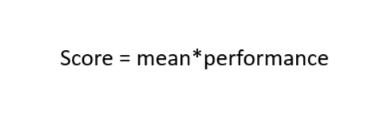

Low

In [9]:
sol = vendor_scaled.apply(lambda col: col * get_mean_val(col.name, 'low') if col.name not in ['computer_id'] else col)
sol['score'] = sol['memory'] + sol['processing'] + sol['storage'] + sol['inverse_price']
sol.loc[sol['score'] == sol['score'].max()]

,computer_id,memory,processing,storage,inverse_price,score
2,4,0.156,0.135,0.405,0.025,0.721
10,12,0.156,0.135,0.405,0.025,0.721


Medium

In [10]:
sol = vendor_scaled.apply(lambda col: col * get_mean_val(col.name, 'medium') if col.name not in ['computer_id'] else col)
sol['score'] = sol['memory'] + sol['processing'] + sol['storage'] + sol['inverse_price']
sol.loc[sol['score'] == sol['score'].max()]

,computer_id,memory,processing,storage,inverse_price,score
2,4,0.148605,0.30532,0.225,0.025,0.703924
10,12,0.148605,0.30532,0.225,0.025,0.703924


High

In [11]:
sol = vendor_scaled.apply(lambda col: col * get_mean_val(col.name, 'high') if col.name not in ['computer_id'] else col)
sol['score'] = sol['memory'] + sol['processing'] + sol['storage'] + sol['inverse_price']
sol.loc[sol['score'] == sol['score'].max()]

,computer_id,memory,processing,storage,inverse_price,score
1,16,0.340875,0.2085,0.099562,0.0325,0.681438


In [12]:
vendor

,computer_id,memory,processing,storage,inverse_price
0,13,5,7,10,2.7
1,16,9,8,9,1.3
2,4,8,9,10,1.0
3,1,8,8,9,1.7
4,3,5,4,4,5.7
5,2,6,7,7,3.3
6,20,7,10,7,2.0
7,8,9,6,9,2.0
8,9,9,8,7,2.0
9,7,7,7,9,2.3


In [13]:
mean

,utilization_bin,memory,processing,storage,inverse_price
0,high,0.378750,0.260625,0.110625,0.25
1,low,0.195000,0.150000,0.405000,0.25
2,medium,0.185756,0.339244,0.225000,0.25
